In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from stargazer.stargazer import Stargazer
import statsmodels.api as sm

In [45]:
# importing the data and creating the general Dataframe

path_train = './data/train.csv'
path_test = './data/test.csv'
path_sample_submission = './data/sample_submission.csv'
data_train = pd.read_csv(path_train)

df = pd.DataFrame(data_train)
display(df)

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,9º - 1a,False,False,Sant Martí,0.0,False,False,NaN,1066
7996,5192,4.0,3.0,166.0,NaN,1995.0,9º - 4a,False,False,Nou Barris,9.0,False,False,NaN,1255
7997,5391,4.0,1.0,89.0,east,2015.0,9º - 3a,True,False,Sant Martí,0.0,True,False,1.0,1220
7998,861,4.0,2.0,167.0,west,1977.0,8º - 4a,False,True,Gràcia,0.0,True,False,NaN,1547


The average price of an apartment in Barcelona is: 1099.62 euros.


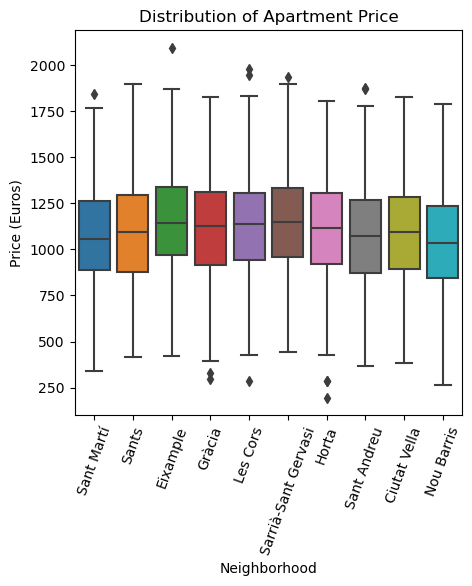

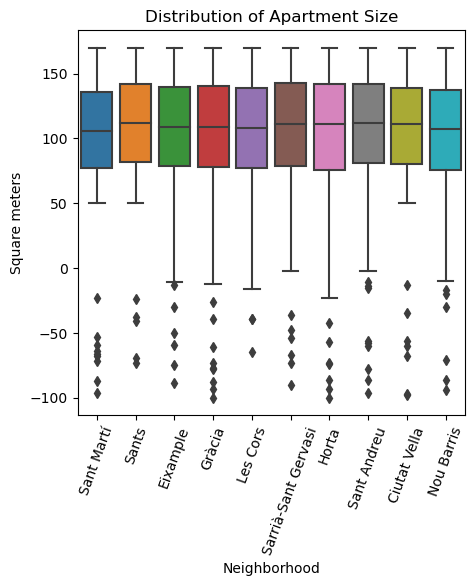

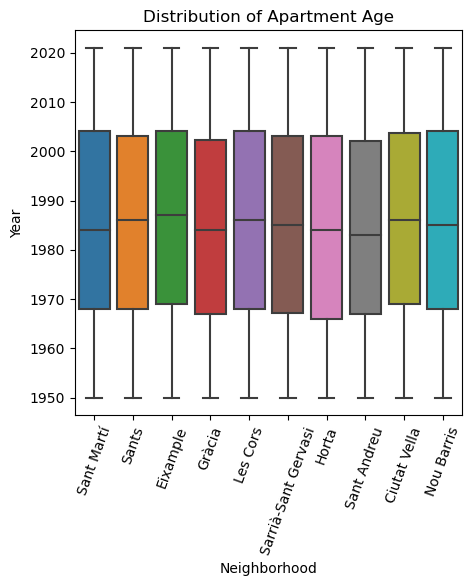

In [46]:
# Data exploration - Complete Dataset
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x ='neighborhood', y = 'price')
plt.title('Distribution of Apartment Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=70)

plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x ='neighborhood', y = 'square_meters')
plt.title('Distribution of Apartment Size')
plt.xlabel('Neighborhood')
plt.ylabel('Square meters')
plt.xticks(rotation=70)

plt.figure(figsize=(5, 5))
sns.boxplot(data = df, x ='neighborhood', y = 'year_built')
plt.title('Distribution of Apartment Age')
plt.xlabel('Neighborhood')
plt.ylabel('Year')
plt.xticks(rotation=70)

mean_price = round(df['price'].mean(), 2)

print(f"The average price of an apartment in Barcelona is: {mean_price} euros.")

In [47]:
# Data Exploration

# Describing Dataframe
shape = df.shape
print(f"The Dataframe has a shape of {shape[0]} rows and {shape[1]} columns.")
var_types=df.dtypes
print(f"\nThe variable types of the Dataframe are the following:")
display(var_types)

# Descriptives
print(f"\nThe descriptives of the Dataframe are the following:")
describe_df = df.describe()
display(describe_df)

The Dataframe has a shape of 8000 rows and 15 columns.

The variable types of the Dataframe are the following:


id                    int64
num_rooms           float64
num_baths           float64
square_meters       float64
orientation          object
year_built          float64
door                 object
is_furnished         object
has_pool             object
neighborhood         object
num_crimes          float64
has_ac               object
accepts_pets         object
num_supermarkets    float64
price                 int64
dtype: object


The descriptives of the Dataframe are the following:


,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,1411.000000,8000.000000
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1.982991,1099.616250
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,0.803182,271.686617
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,2.000000,1104.000000
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,3.000000,1295.000000
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000


The Dataframe for the Les Corts data has a shape of 744 rows and 16 columns.

The descriptives of the Dataframe are the following:


,index,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price
count,744.000000,744.000000,744.000000,731.000000,733.000000,725.000000,730.000000,154.000000,744.000000
mean,3987.806452,4903.649194,2.938172,1.972640,107.638472,1985.628966,1.428767,1.967532,1127.502688
std,2293.340879,2837.876153,5.796824,0.813796,36.727902,20.524921,2.764858,0.787308,261.925729
min,9.000000,16.000000,1.000000,1.000000,-65.000000,1950.000000,0.000000,1.000000,288.000000
25%,2038.250000,2499.000000,2.000000,1.000000,77.000000,1968.000000,0.000000,1.000000,941.000000
50%,3862.500000,4851.000000,2.000000,2.000000,108.000000,1986.000000,0.000000,2.000000,1138.000000
75%,6036.500000,7247.250000,3.000000,3.000000,139.000000,2004.000000,1.000000,3.000000,1306.250000
max,7984.000000,9998.000000,83.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,1980.000000


The difference in the average price of apartments in Barcelona compared to the ones strictly in Les Corts is -27.88, so the mean price in Les Corts is slightly above average.


Text(0.5, 0, 'Price')

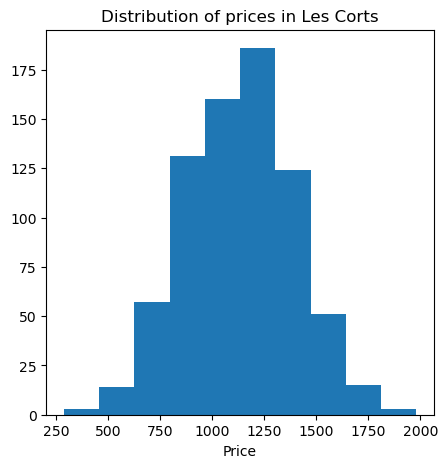

In [48]:
# Data exploration - Description of Dataset Les Corts

df1 = df[df['neighborhood'] == 'Les Cors'].reset_index()
# CHANGE THE NAME IN LES CORTS IN ALL THE ROWS

# Describing Dataframe
shape = df1.shape
print(f"The Dataframe for the Les Corts data has a shape of {shape[0]} rows and {shape[1]} columns.")

# Descriptives
print(f"\nThe descriptives of the Dataframe are the following:")
describe_df1 = df1.describe()
display(describe_df1)

mean_price1=round(df1['price'].mean(), 2)
print(f"The difference in the average price of apartments in Barcelona compared to the ones strictly in Les Corts is {round(mean_price - mean_price1, 2)}, so the mean price in Les Corts is slightly above average.")

plt.figure(figsize=(5,5))
plt.hist(df1['price'])
plt.title('Distribution of prices in Les Corts')
plt.xlabel('Price')



In [49]:
# Handling Missing Data - Deleting column 'num_supermarkets'
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

missing_percentage = round(df.isnull().sum()/len(df) * 100, 3)
print(missing_percentage)

# One can argue that the number of supermarkets column can be dropped
threshold = 80
columns_to_drop = missing_percentage[missing_percentage >= threshold].index
df_new = df.drop(columns_to_drop, axis=1)
df = df_new



id                   0.000
num_rooms            0.000
num_baths            2.000
square_meters        1.938
orientation         29.263
year_built           2.125
door                 1.862
is_furnished         2.062
has_pool             1.950
neighborhood         2.062
num_crimes           2.000
has_ac               2.113
accepts_pets         1.938
num_supermarkets    82.363
price                0.000
dtype: float64


In [54]:
# Regression: Price dependent variable

# Using statsmodels formulas to fit an OLS model, ensuring that data is a DataFrame
model = sm.OLS.from_formula('price ~ num_rooms + num_baths + square_meters + year_built + is_furnished + has_pool + num_crimes + has_ac + accepts_pets' , data=df).fit()

# Now we can use Stargazer
stargazer = Stargazer([model])
stargazer

# START DOING FEATURE ENGINEERING TO INCREASE THE R^2

# vars_affecting_price = ['num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac', 'accepts_pets']